In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

from scipy.stats import ttest_ind, mannwhitneyu


Classification of Comments: Climate Skeptics vs Climate Science

# Part 1

In [96]:
df = pkl.load(open('project8.pkl', 'rb'))
df.shape

(2027, 19)

In [97]:
df.head()

,Unnamed: 0,post_id,self_text,user_is_verified,controversiality,ups,downs,subreddit,score,user_awardee_karma,user_awarder_karma,user_total_karma,user_comment_karma,user_link_karma,post_score,post_upvote_ratio,post_thumbs_up,post_total_awards_ratio,post_created_time
0,1979,9grgvl,"Yes, modeling anything with less resolution i...",True True True True True True True,0.142857,2.857143,0,climate_science,2.857143,8.571429,0.000000,11034.571429,10438.285714,587.714286,33,0.97,33,0,2018-09-18 03:59:40
1,503,1anritd,"Thing is, there's no official paper that desc...",True True True True True True True,0.000000,9.000000,0,climateskeptics,9.000000,748.142857,9.571429,91926.000000,42031.571429,49136.714286,67,0.94,67,0,2024-02-10 21:56:09
2,1387,16xyvqf,I read that article a month ago. Not sure wh...,True,0.000000,2.000000,0,climateskeptics,2.000000,315.000000,0.000000,37103.000000,36305.000000,483.000000,7,0.73,7,0,2023-10-02 14:58:12
3,918,18ii60q,&gt; Dr. Paul Pettré provides a damning critq...,True,0.000000,3.000000,0,climateskeptics,3.000000,1683.000000,20.000000,164653.000000,63989.000000,98961.000000,12,0.93,12,0,2023-12-14 20:42:33
4,1375,16zuc0a,This was a really good interview. She really ...,False,0.000000,3.000000,0,climateskeptics,3.000000,1703.000000,114.000000,1817.000000,0.000000,0.000000,27,0.97,27,0,2023-10-04 18:12:08


In [98]:
print("size of the dataset: ", df.shape)
print("columns in the dataset: ", df.columns)
print("data types of the columns: ", df.dtypes)

size of the dataset:  (2027, 19)
columns in the dataset:  Index(['Unnamed: 0', 'post_id', 'self_text', 'user_is_verified',
       'controversiality', 'ups', 'downs', 'subreddit', 'score',
       'user_awardee_karma', 'user_awarder_karma', 'user_total_karma',
       'user_comment_karma', 'user_link_karma', 'post_score',
       'post_upvote_ratio', 'post_thumbs_up', 'post_total_awards_ratio',
       'post_created_time'],
      dtype='object')
data types of the columns:  Unnamed: 0                   int64
post_id                     object
self_text                   object
user_is_verified            object
controversiality           float64
ups                        float64
downs                        int64
subreddit                   object
score                      float64
user_awardee_karma         float64
user_awarder_karma         float64
user_total_karma           float64
user_comment_karma         float64
user_link_karma            float64
post_score                   int64
po

In [99]:
grouped = df.groupby("subreddit")
grouped.size()

subreddit
climate_science     442
climateskeptics    1585
dtype: int64

In [100]:
climate_science_group = grouped.get_group("climate_science")
climateskeptics_group = grouped.get_group("climateskeptics")

print("size of the climate_science group: ", climate_science_group.shape)
print("size of the climateskeptics group: ", climateskeptics_group.shape)

size of the climate_science group:  (442, 19)
size of the climateskeptics group:  (1585, 19)


In [101]:
quantative_features = [x for x in df.columns if df[x].dtype != 'object']
quantative_features.remove("Unnamed: 0")
print("quantative features: ", quantative_features)
print(len(quantative_features))

quantative features:  ['controversiality', 'ups', 'downs', 'score', 'user_awardee_karma', 'user_awarder_karma', 'user_total_karma', 'user_comment_karma', 'user_link_karma', 'post_score', 'post_upvote_ratio', 'post_thumbs_up', 'post_total_awards_ratio']
13


In [102]:
quants = ["score", "controversiality", "ups", "downs", "user_awardee_karma", "user_awarder_karma", "user_total_karma", "user_comment_karma", "user_link_karma"]
quants = quantative_features
statistics = grouped[quants].agg(['mean', 'var']).round(3)

In [103]:
#output the statistics to a html file
table = statistics.to_html()
with open('statistics.html', 'w') as f:
    f.write(table)

statistics

controversiality           ups         downs       score  \
                            mean    var   mean     var  mean  var   mean   
subreddit                                                                  
climate_science            0.006  0.002  3.688   8.019   0.0  0.0  3.688   
climateskeptics            0.006  0.001  4.843  11.684   0.0  0.0  4.843   

                        user_awardee_karma               ... user_link_karma  \
                    var               mean          var  ...            mean   
subreddit                                                ...                   
climate_science   8.019            708.492  5570532.454  ...       41452.461   
climateskeptics  11.684            550.925   246736.288  ...       26423.145   

                              post_score           post_upvote_ratio         \
                          var       mean       var              mean    var   
subreddit                                                                     
climate_science  4.002539e+10     25.903   776.587             0.890  0.014   
climateskeptics  1.503040e+09     71.235  6237.559             0.867  0.019   

                post_thumbs_up           post_total_awards_ratio       
                          mean       var                    mean  var  
subreddit                                                              
climate_science         25.903   776.587                     0.0  0.0  
climateskeptics         71.235  6237.559                     0.0  0.0  

[2 rows x 26 columns]

# Part 2

In [104]:
#subreddits_to_compare = ['climate_science', 'climateskeptics']
#filtered_df = df[df['subreddit'].isin(subreddits_to_compare)]

df_sci = grouped.get_group('climate_science')
df_skep = grouped.get_group('climateskeptics')



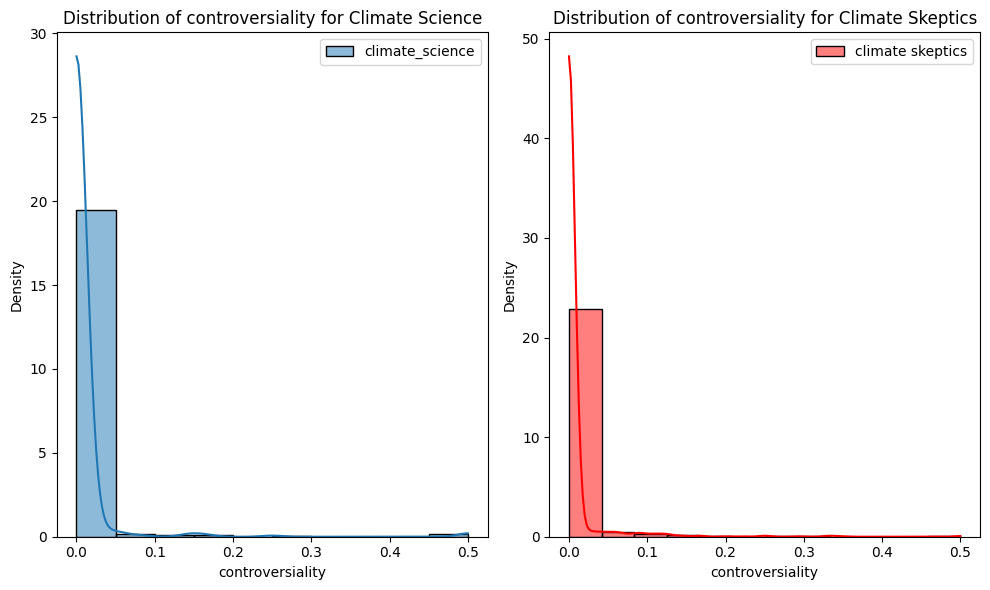

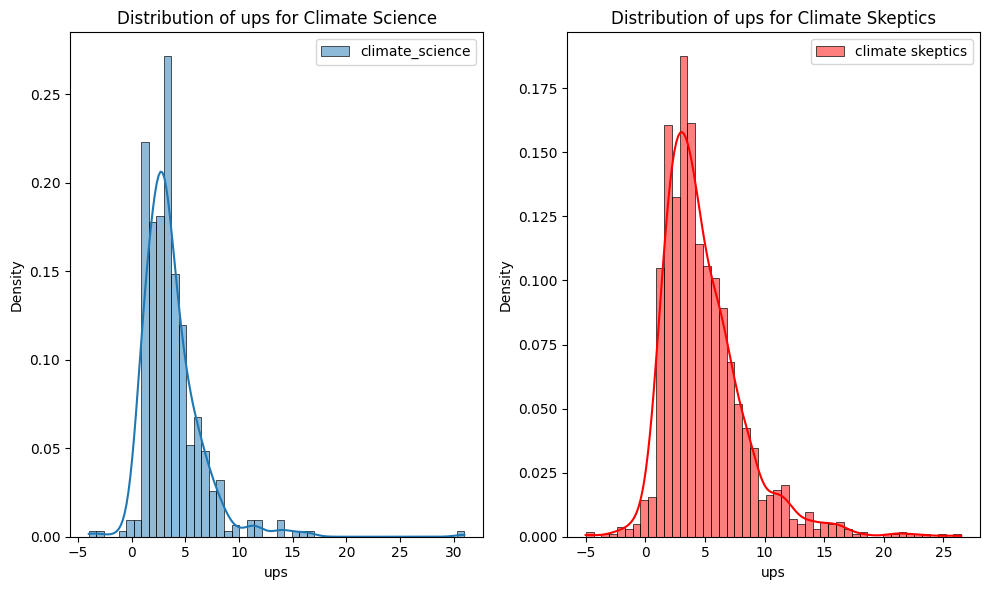

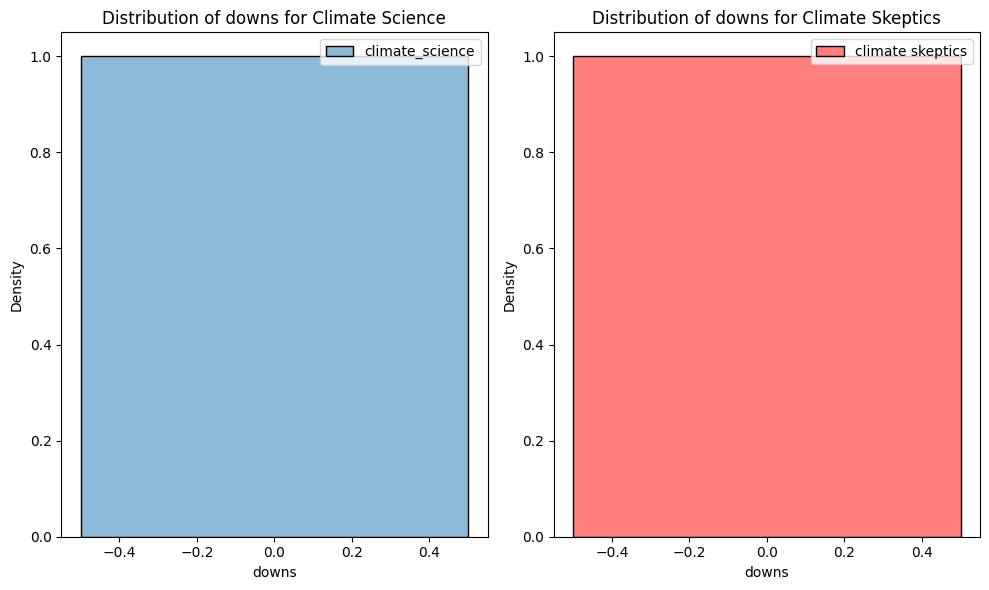

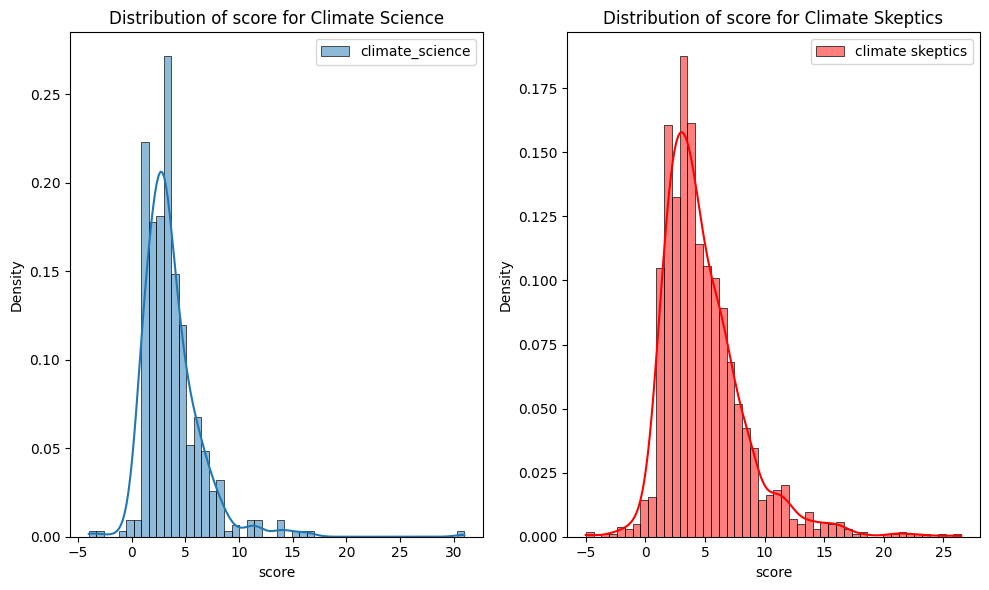

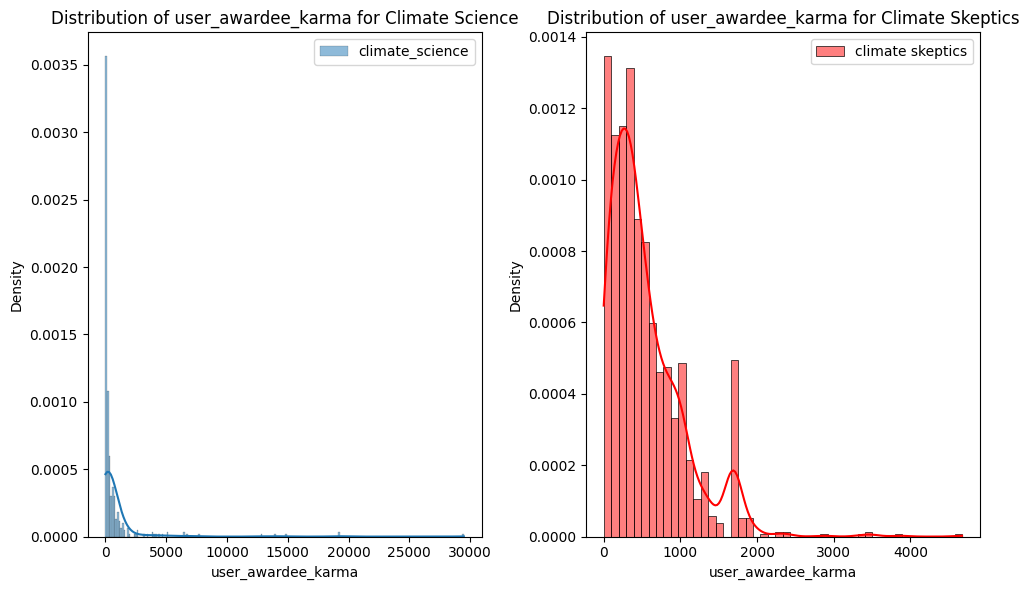

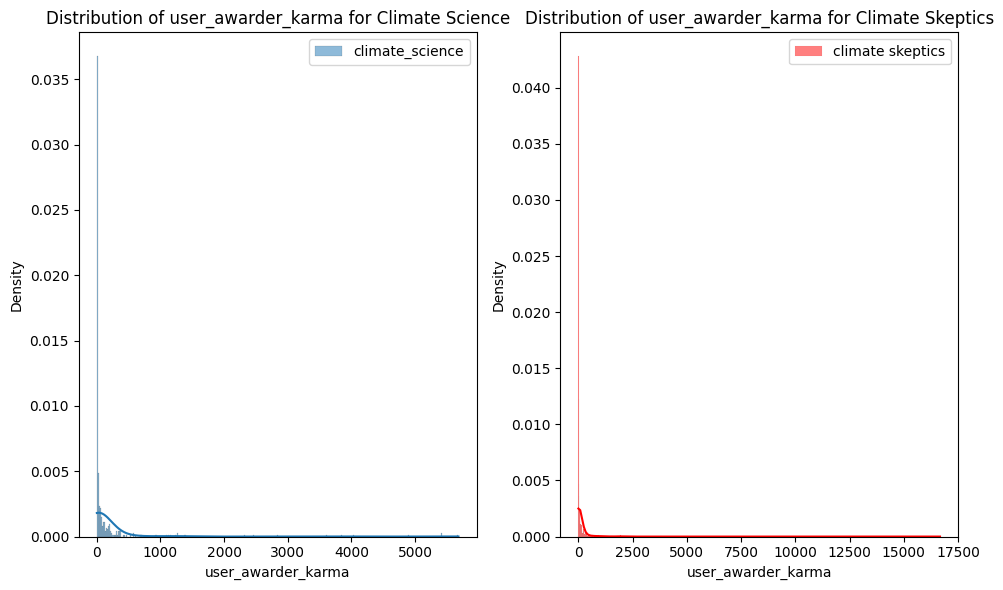

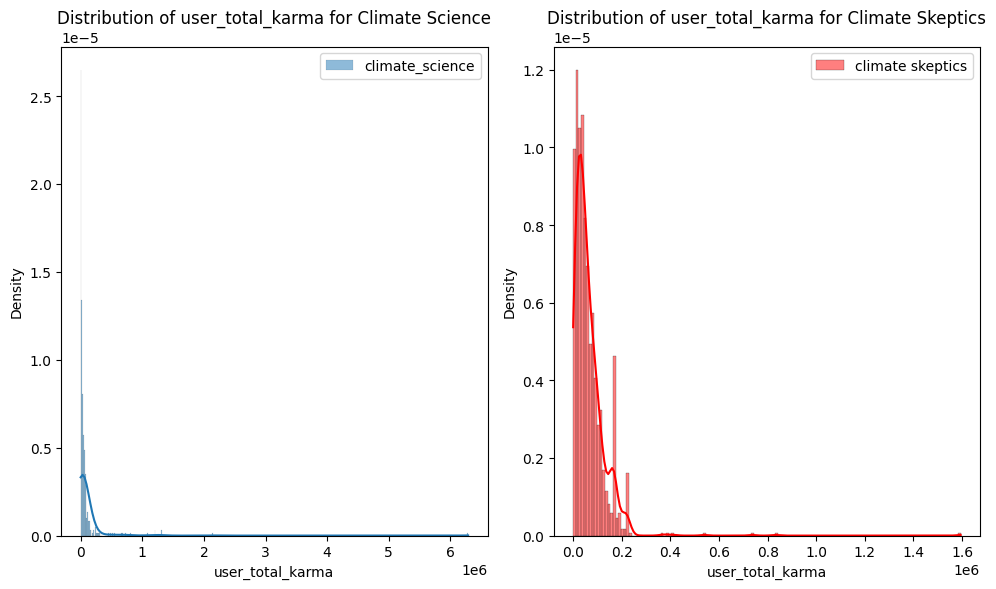

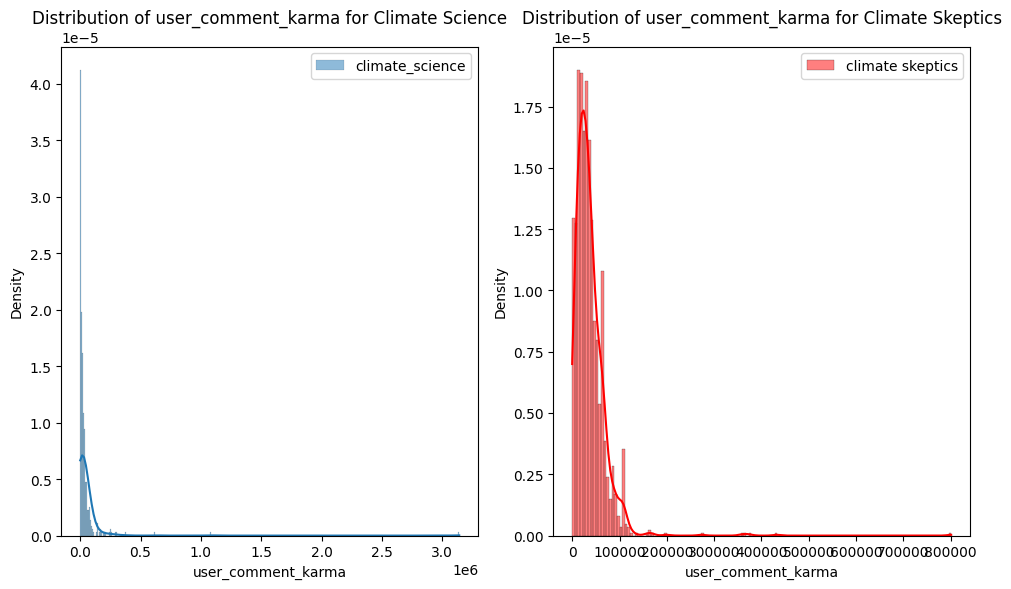

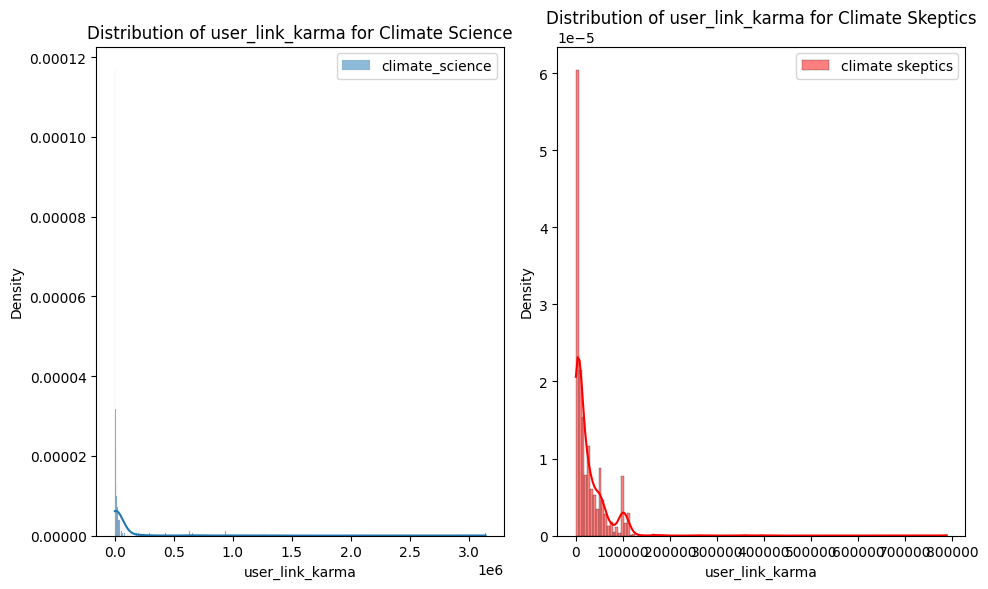

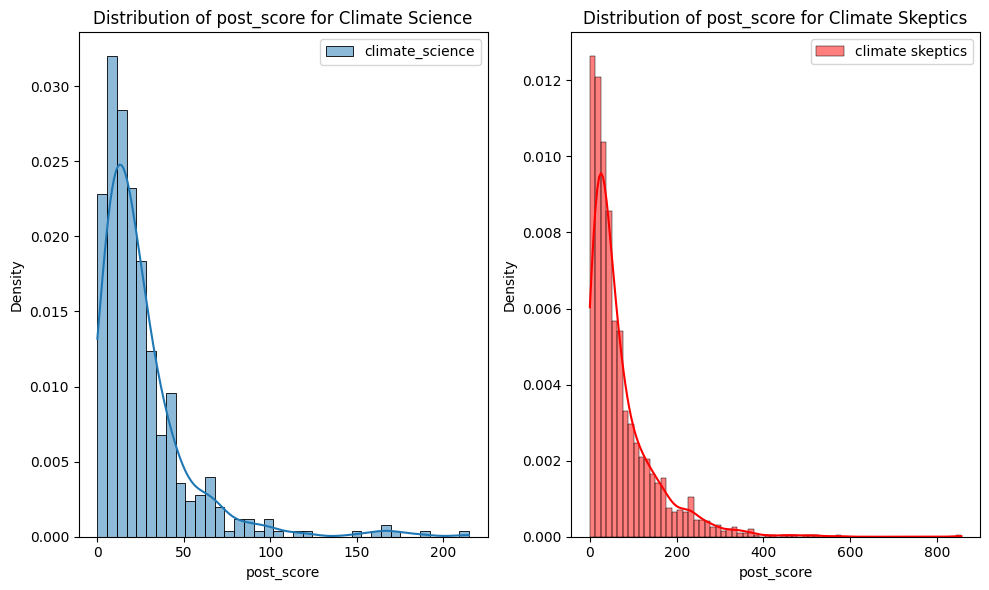

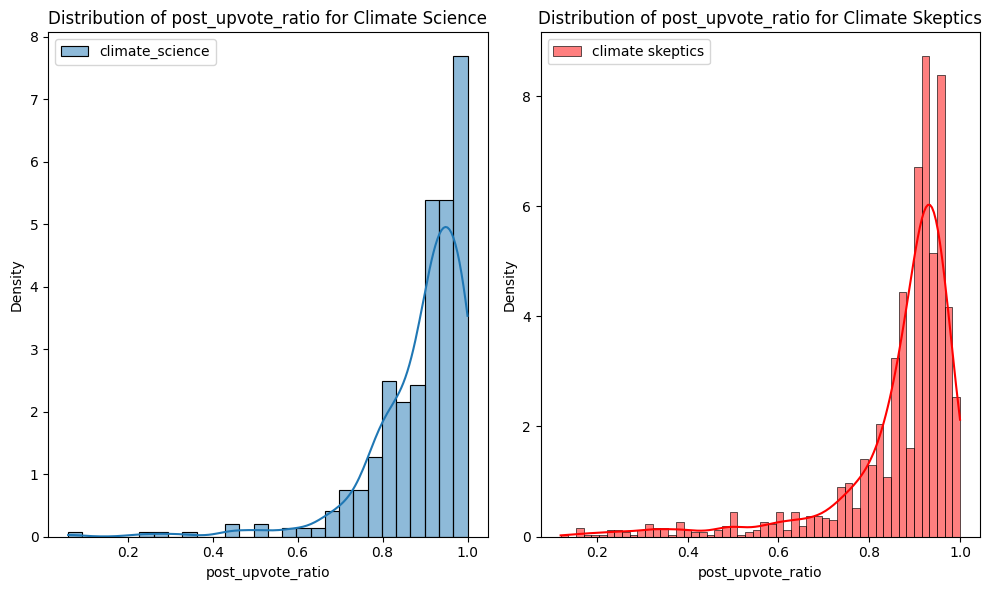

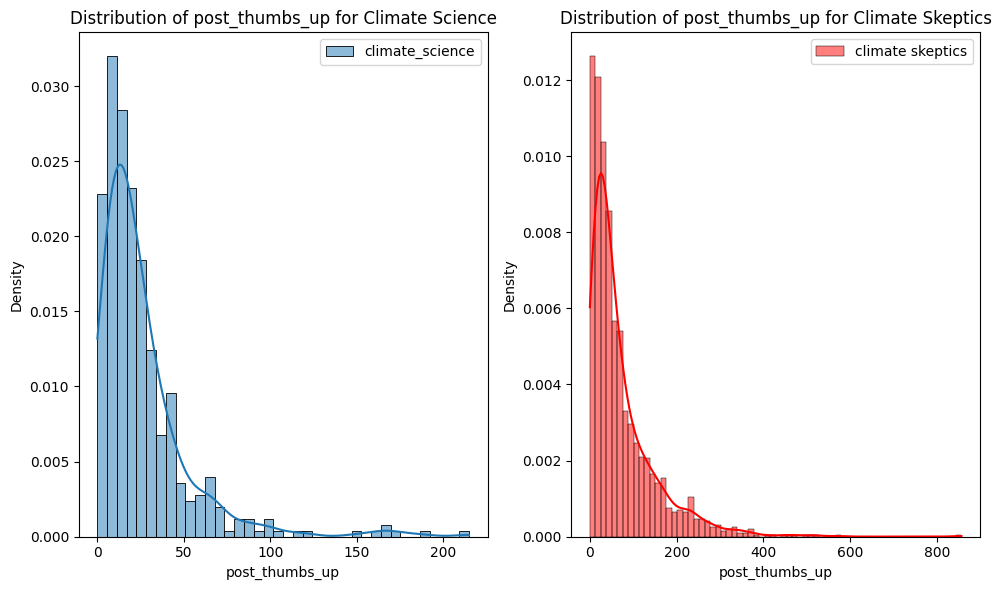

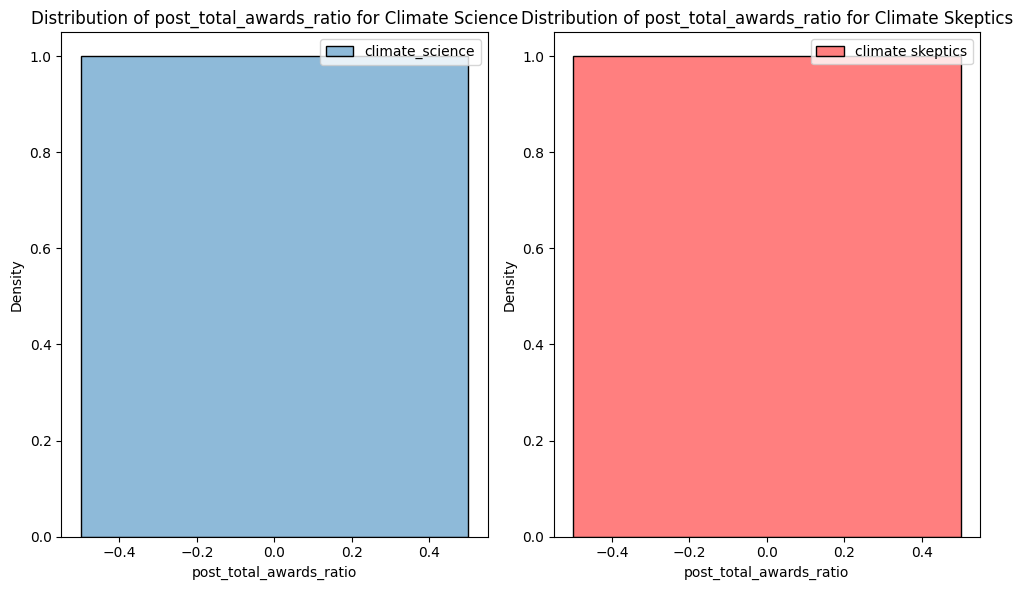

In [105]:
# Plotting distributions for each feature
for feature in quants:
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    sns.histplot(data=df_sci, x=feature, kde=True, stat="density", ax=ax[0], label='climate_science')
    sns.histplot(data=df_skep, x=feature, kde=True, stat="density", ax=ax[1], label='climate skeptics', color='red')
    ax[0].set_title(f'Distribution of {feature} for Climate Science')
    ax[1].set_title(f'Distribution of {feature} for Climate Skeptics')
    ax[0].set_xlabel(feature)
    ax[1].set_xlabel(feature)
    ax[0].set_ylabel('Density')
    ax[1].set_ylabel('Density')
    ax[0].legend()
    ax[1].legend()
    plt.tight_layout()
    plt.show()

# Part 3

In [115]:
#performing t-test
ttest_results = {}

for feature in quants:
    df_sci[feature].dropna()
    df_skep[feature].dropna()
    ttest = ttest_ind(df_sci[feature], df_skep[feature], equal_var=False)
    ttest_results[feature] = ttest

ttest_results

{'controversiality': TtestResult(statistic=0.009980559292943914, pvalue=0.9920402009269687, df=584.9457797191046),
 'ups': TtestResult(statistic=-7.231013600960234, pvalue=1.0853354570110612e-12, df=833.8520308258534),
 'downs': TtestResult(statistic=nan, pvalue=nan, df=1.0),
 'score': TtestResult(statistic=-7.231013600960234, pvalue=1.0853354570110612e-12, df=833.8520308258534),
 'user_awardee_karma': TtestResult(statistic=1.410347250281248, pvalue=0.15912503525478616, df=451.95019816861),
 'user_awarder_karma': TtestResult(statistic=1.1905213732243705, pvalue=0.23427527394379286, df=651.2911670104353),
 'user_total_karma': TtestResult(statistic=1.1321696116012971, pvalue=0.2581643455133801, df=451.27912716803723),
 'user_comment_karma': TtestResult(statistic=0.4561828218692107, pvalue=0.6484768804732661, df=453.53545307504737),
 'user_link_karma': TtestResult(statistic=1.5798878329846828, pvalue=0.11483477367739098, df=450.2551097324563),
 'post_score': TtestResult(statistic=-19.0004

In [116]:
for feature, t_result in ttest_results.items():
    if t_result[1] < 0.05:
        print(f"Feature {feature} has a significant difference between the two groups")

Feature ups has a significant difference between the two groups
Feature score has a significant difference between the two groups
Feature post_score has a significant difference between the two groups
Feature post_upvote_ratio has a significant difference between the two groups
Feature post_thumbs_up has a significant difference between the two groups


In [117]:
mannwhitneyu_results = {}

for feature in quants:
    df_sci[feature].dropna()
    df_skep[feature].dropna()
    mwu = mannwhitneyu(df_sci[feature], df_skep[feature])
    mannwhitneyu_results[feature] = mwu

mannwhitneyu_results

{'controversiality': MannwhitneyuResult(statistic=341908.0, pvalue=0.051861227376005244),
 'ups': MannwhitneyuResult(statistic=269330.0, pvalue=9.815339124051066e-14),
 'downs': MannwhitneyuResult(statistic=350285.0, pvalue=1.0),
 'score': MannwhitneyuResult(statistic=269330.0, pvalue=9.815339124051066e-14),
 'user_awardee_karma': MannwhitneyuResult(statistic=234201.5, pvalue=1.3968999423281468e-26),
 'user_awarder_karma': MannwhitneyuResult(statistic=320650.5, pvalue=0.005844162190070717),
 'user_total_karma': MannwhitneyuResult(statistic=247120.5, pvalue=2.510181897001504e-21),
 'user_comment_karma': MannwhitneyuResult(statistic=246298.5, pvalue=1.213176980688028e-21),
 'user_link_karma': MannwhitneyuResult(statistic=260743.0, pvalue=1.8815681026560995e-16),
 'post_score': MannwhitneyuResult(statistic=194172.0, pvalue=1.0894145196770854e-46),
 'post_upvote_ratio': MannwhitneyuResult(statistic=391036.0, pvalue=0.00017669042645919296),
 'post_thumbs_up': MannwhitneyuResult(statistic=19

In [118]:
for feature, mwu_result in mannwhitneyu_results.items():
    if mwu_result[1] < 0.05:
        print(f"Feature {feature} has a significant difference between the two groups")
        

Feature ups has a significant difference between the two groups
Feature score has a significant difference between the two groups
Feature user_awardee_karma has a significant difference between the two groups
Feature user_awarder_karma has a significant difference between the two groups
Feature user_total_karma has a significant difference between the two groups
Feature user_comment_karma has a significant difference between the two groups
Feature user_link_karma has a significant difference between the two groups
Feature post_score has a significant difference between the two groups
Feature post_upvote_ratio has a significant difference between the two groups
Feature post_thumbs_up has a significant difference between the two groups
